In [97]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os

In [253]:
# Import New York weather data

newyork_weather =  pd.read_csv('../DataSets/NYC_Central_Park_weather_1869-2022.csv')
                                

In [243]:
# Import Dublin weather data.
dublin_weather = pd.read_csv('../DataSets/weather_glasnevin.csv')


In [254]:
print(newyork_weather.head())

         DATE  PRCP  SNOW  SNWD  TMIN  TMAX
0  1869-01-01  0.75   9.0   NaN  19.0  29.0
1  1869-01-02  0.03   0.0   NaN  21.0  27.0
2  1869-01-03  0.00   0.0   NaN  27.0  35.0
3  1869-01-04  0.18   0.0   NaN  34.0  37.0
4  1869-01-05  0.05   0.0   NaN  37.0  43.0


In [244]:
print (dublin_weather.head())

          date  ind  maxtp  ind.1  mintp  igmin  gmin  ind.2  rain     cbl  \
0  01-Jan-1942    0    9.7      0    6.8      0   4.7      2   0.0  1020.3   
1  02-Jan-1942    0    9.9      0    7.9      0   6.7      0   0.1  1016.2   
2  03-Jan-1942    0   11.2      0    8.9      0   7.2      0   1.5  1006.8   
3  04-Jan-1942    0    9.2      0    2.7      0   3.4      0   3.5  1001.5   
4  05-Jan-1942    0    3.5      1   -0.8      0   0.0      0   0.6  1013.4   

   ...  hg  sun  dos  g_rad  soil   pe  evap  smd_wd  smd_md  smd_pd  
0  ... NaN  0.0  0.0    NaN   NaN  1.1   1.4     NaN     NaN     NaN  
1  ... NaN  0.0  0.0    NaN   NaN  0.7   0.9     NaN     NaN     NaN  
2  ... NaN  0.1  0.0    NaN   NaN  0.5   0.6     NaN     NaN     NaN  
3  ... NaN  0.6  0.0    NaN   NaN  0.6   0.7     NaN     NaN     NaN  
4  ... NaN  3.4  0.0    NaN   NaN  0.6   0.7     NaN     NaN     NaN  

[5 rows x 26 columns]


In [255]:
# Function to clean up dataset
# Checks for null values, and fills in with value next to it in the column
# Drops rows where there are duplicates
def Weather_Data_Cleanup ( weather_df, location): 
    # Null Value check and fill
    print("Null values found in " + location + " weather dataset:")
    print(weather_df.isna().sum())
    weather_df = weather_df.fillna(method='bfill', axis=1).fillna(0)
    print("Filled in null values with the value on next day")
    print("-----------------------------------------")
    print("Null values should now be all zero ")
    print(weather_df.isna().sum())
    # Duplicate check and removal
    print("-----------------------------------------")
    print("Looking for duplicates ...")
    lines_before =  len(weather_df)
    lines_after = len(weather_df.drop_duplicates())
    if lines_before > lines_after:
        print ("Duplicates found and removed.")
    else: 
        print ("No duplicates found.")
    return weather_df     
     

In [100]:
# Clean the New York Weather Dataset
newyork_weather = Weather_Data_Cleanup(newyork_weather, "New York")

Null values found in New York weather dataset:
DATE        0
PRCP        0
SNOW      163
SNWD    16558
TMIN        7
TMAX        7
dtype: int64
Filled in null values with the value on next day
-----------------------------------------
Null values should now be all zero 
DATE    0
PRCP    0
SNOW    0
SNWD    0
TMIN    0
TMAX    0
dtype: int64
-----------------------------------------
Looking for duplicates ...
No duplicates found.


In [245]:
# Clean the Dublin Weather Dataset
dublin_weather = Weather_Data_Cleanup(dublin_weather, "Dublin")

Null values found in New York weather dataset:
date          0
ind           0
maxtp         0
ind.1         0
mintp         0
igmin         0
gmin          5
ind.2         0
rain          0
cbl           0
wdsp          0
ind.3         0
hm          887
ind.4         0
ddhm        899
ind.5         0
hg          887
sun           0
dos           4
g_rad     12568
soil       4322
pe            0
evap          2
smd_wd    13814
smd_md    13814
smd_pd    13814
dtype: int64
Filled in null values with the value on next day
-----------------------------------------
Null values should now be all zero 
date      0
ind       0
maxtp     0
ind.1     0
mintp     0
igmin     0
gmin      0
ind.2     0
rain      0
cbl       0
wdsp      0
ind.3     0
hm        0
ind.4     0
ddhm      0
ind.5     0
hg        0
sun       0
dos       0
g_rad     0
soil      0
pe        0
evap      0
smd_wd    0
smd_md    0
smd_pd    0
dtype: int64
-----------------------------------------
Looking for duplicates ...
No 

In [246]:
# Function to prepare and standardise the dataset so it can be compared with other weather datasets
#  - slice to only contain Date and Max temperature data
#  - Column names to be set to 'DATE' and 'TMAX'
#  - Convert date column to datetime format
#  - Remove rows outside of time periods from 1-Jan-1943 to 31-12-2022
#  - Separate out the month and year which we will need for analysing the data per month
#  - Updated dataframe is returned

def Weather_Slice_Data (weather_df, TMAX_column_name, DATE_column_name):
# slice data - Date and Daily Max Temp
    weather_df = weather_df.loc[:,[DATE_column_name ,TMAX_column_name]]
# rename columns to DATE and YEAR
    weather_df.rename(columns = {DATE_column_name:'DATE', TMAX_column_name:'TMAX'}, inplace = True)
# convert date to datetime 
    weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

# Slicing data rows to between 01-01-1943 and 31-12-2022 
    start_day = '01-01-1943'
    end_day = '12.31.2022'
    start_day = pd.to_datetime(start_day)
    end_day = pd.to_datetime(end_day)
    weather_df = weather_df.loc[weather_df['DATE'].between(start_day, end_day)]
    
# extracting month and year in prep for grouping
    weather_df['MONTH']=pd.to_datetime(weather_df['DATE']).dt.month
    weather_df['YEAR']=pd.to_datetime(weather_df['DATE']).dt.year
 
    return weather_df
    

In [103]:
# Standardise the New York Weather Dataset
newyork_weather = Weather_Slice_Data (newyork_weather, 'TMAX', 'DATE')

In [104]:
# Print out updated dataset
print (newyork_weather.head())

            DATE  TMAX  MONTH  YEAR
27027 1943-01-01  38.0      1  1943
27028 1943-01-02  37.0      1  1943
27029 1943-01-03  34.0      1  1943
27030 1943-01-04  40.0      1  1943
27031 1943-01-05  28.0      1  1943


In [247]:
# Standardise the Dublin Weather Dataset
dublin_weather = Weather_Slice_Data (dublin_weather, 'maxtp', 'date')

In [248]:
# Print out updated dataset
print (dublin_weather.head())

          DATE  TMAX  MONTH  YEAR
365 1943-01-01  10.4      1  1943
366 1943-01-02   5.4      1  1943
367 1943-01-03   2.9      1  1943
368 1943-01-04   4.1      1  1943
369 1943-01-05   6.8      1  1943


In [105]:
# function to Convert temperatures from Fahrenheit to Celsius
def convert_fahrenheit_to_celsius(fahrenheit):
    celsius = float(fahrenheit - 32) * 5 / 9
    return round(celsius,1)

In [106]:
#applying fahrenheit to celsius conversion to teh temperature columns
newyork_weather['TMAX']= newyork_weather['TMAX'].apply(convert_fahrenheit_to_celsius)

In [137]:
print (newyork_weather.head())

            DATE  TMAX  MONTH  YEAR
27027 1943-01-01   3.3      1  1943
27028 1943-01-02   2.8      1  1943
27029 1943-01-03   1.1      1  1943
27030 1943-01-04   4.4      1  1943
27031 1943-01-05  -2.2      1  1943


In [127]:
# Having a high level look at the temperatures, basic stats 

weather_analysis = newyork_weather.describe()
max_temp = weather_analysis['TMAX'].loc['max']
min_temp = weather_analysis['TMAX'].loc['min']
mean_temp = round(weather_analysis['TMAX'].loc['mean'], 1)
print("From the years 1943 to 2022, New York temperatures spanned from "+ str(min_temp) + \
      "C to " + str(max_temp) + "C with average temp " + str(mean_temp) + "C.")

From the years 1943 to 2022, temperatures spanned from -13.3C to 40.0C with average temp 17.0C.


In [249]:
weather_analysis = dublin_weather.describe()
max_temp = weather_analysis['TMAX'].loc['max']
min_temp = weather_analysis['TMAX'].loc['min']
mean_temp = round(weather_analysis['TMAX'].loc['mean'], 1)
print("From the years 1943 to 2022, Dublin temperatures spanned from "+ str(min_temp) + \
      "C to " + str(max_temp) + "C with average temp " + str(mean_temp) + "C.")

From the years 1943 to 2022, Dublin temperatures spanned from -4.7C to 29.1C with average temp 13.0C.


In [250]:
# Function to look at overall temperature trends
# Group by year+month, rolling up daily max temperatures to the mean for that month
# Calculate the rolling momthly average over 10 years
# Plot the rolling average over the monthly average max temperature (very busy graph)
# Plot rolling 10 year monthly average plus the trenline using lmplot
# Return the updated weather dataset with roling 10 year average included

def plot_temperature_trend (weather_df, location):
    avg_monthly_temps= weather_df.groupby(['YEAR','MONTH'], as_index=False)['TMAX'].mean()
    avg_monthly_temps['rolling_10year_monthly_average'] = avg_monthly_temps['TMAX'].rolling(120).mean()

    # Plot monthly averages against the rolling average
    plt.plot(avg_monthly_temps['rolling_10year_monthly_average'], label='Rolling Mean')
    plt.plot(avg_monthly_temps['TMAX'], label='Average Max Temp')
    plt.legend()
    print (location + ' monthly averages temperatures from 1943 to 2022')

    plt.title = (location + 'Temperatures from 1943 to 2022')
    plt.ylabel('Temp(C)')
    plt.xlabel('Year')
    plt.show()
    
    # Plot rolling average and the rolling average trend using lmplot
    sns.lmplot(data = avg_monthly_temps, x = 'YEAR', y = 'rolling_10year_monthly_average', scatter=False, line_kws={'color': 'red'})
    sns.lineplot(data = avg_monthly_temps, x = 'YEAR', y = 'rolling_10year_monthly_average', legend=False)
    print (location + ' rolling l0 year monthly average temperatures from 1943 to 2022')

    plt.ylabel('Temp(C)')
    plt.xlabel('Monthly 1943- 2023')
    plt.legend(["Trend Line" ," " ,"Rolling_10year_monthly_average"])
    plt.title = (location + 'Temperatures from 1943 to 2022')

    plt.show()
    return avg_monthly_temps


New York monthly averages temperatures from 1943 to 2022


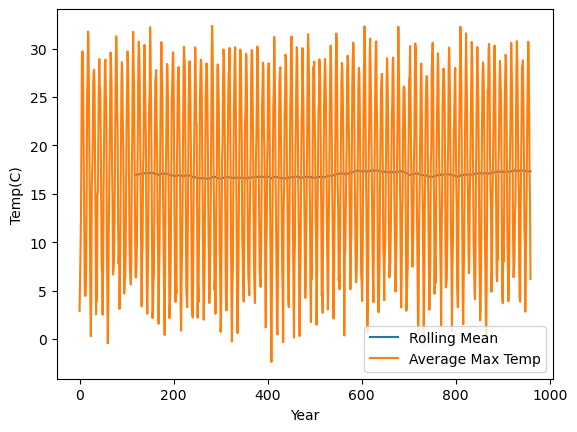

New York rolling l0 year monthly average temperatures from 1943 to 2022


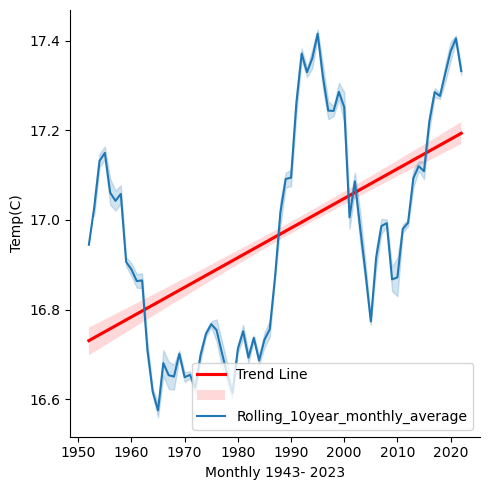

In [238]:
NewYork_Temperture_Trends = plot_temperature_trend (newyork_weather, "New York")

Dublin monthly averages temperatures from 1943 to 2022


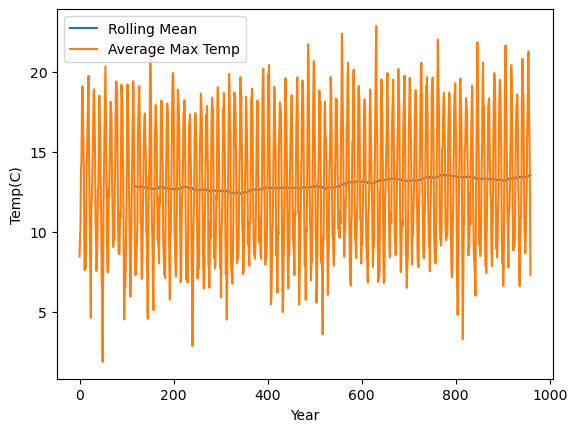

Dublin rolling l0 year monthly average temperatures from 1943 to 2022


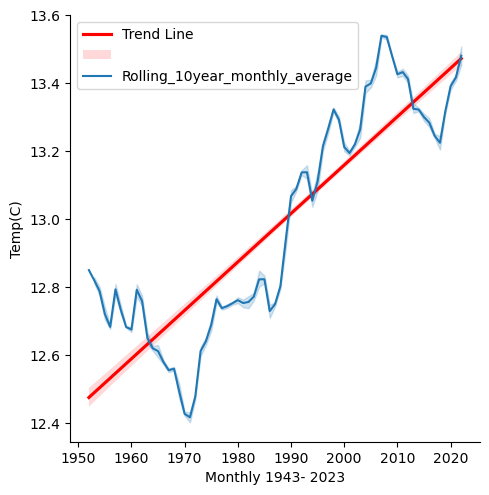

In [251]:
Dublin_Temperture_Trends = plot_temperature_trend (dublin_weather, "Dublin")

In [235]:
# Plotting the temperature trend for a specific month, looking at seasonal affects
# Function takes in weather dataframe, the month to be looked at (e.g. 1, 2 etc)
# and the location of the weather data 
# Steps
# 1. Filters out the data for that specific month
# 2. Group by year and averages out daily temps for that month/year
# 3. Calculate rolling 10 year monthly average
# 4. Plots the rolling 10 year monthly average and the trend line 
#    to see where it is increasing or decreasing
# 5. Returns the updated weather dataset

def plot_month_specific_temperature_trend (weather_df, month, location):
#Setting up month dictionary so we can label the graphs with the name of the month
    monthly_dict = {1: 'January', 2 : 'February', 3: 'March',\
                    4: 'April', 5: 'May', 6: 'June', 7: 'July', \
                    8: 'August', 9: 'September', 10: 'October', \
                    11: 'November', 12: 'December'}


# Looking at only the specified month data, then roll up the daily temps to a monthly averag
    daily_temps_for_specific_month = weather_df.loc[weather_df["MONTH"] == month]
    h = daily_temps_for_specific_month.groupby(["YEAR"])
    specific_month_temperatures = h.aggregate({"TMAX":np.mean})
    
# Calculate rolling 10 year average across the years for that month
    specific_month_temperatures['rolling_10year_monthly_average'] = specific_month_temperatures['TMAX'].rolling(10).mean()

    
# Plotting this rolling 10 year average for this month and the trend line,
#                               to show what way the temperatures are trending  
    sns.lmplot(data = specific_month_temperatures.reset_index(), x = 'YEAR', y = 'rolling_10year_monthly_average', scatter=True, line_kws={'color': 'red'})
    sns.lineplot(data = specific_month_temperatures.reset_index(), x = 'YEAR', y = 'rolling_10year_monthly_average', legend=False)
    print (location + ' ' + monthly_dict[month] + ' temperatures from 1943 to 2022')
#    plt.title ( monthly_dict[month] + ' temperatures from 1943 to 2022')

    plt.ylabel('Temp(C)')
    plt.xlabel( monthly_dict[month] + ' temperatures per year')
    plt.legend(["Rolling_10year_monthly_average" , "Trend Line"])
    plt.show()
    return specific_month_temperatures

In [ ]:
 monthly_dict = {1: 'January', 2 : 'February', 3: 'March',\
                    4: 'April', 5: 'May', 6: 'June', 7: 'July', \
                    8: 'August', 9: 'September', 10: 'October', \
                    11: 'November', 12: 'December'}

New York January temperatures from 1943 to 2022


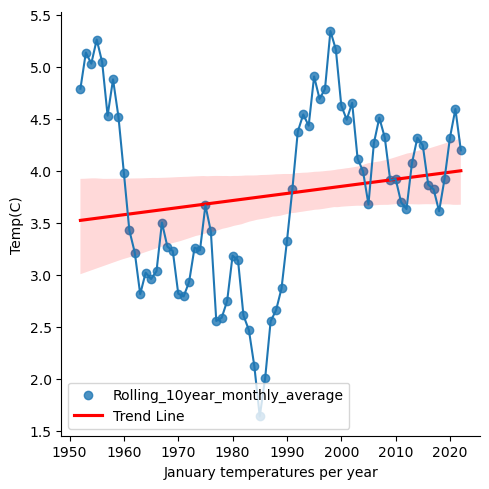

Dublin January temperatures from 1943 to 2022


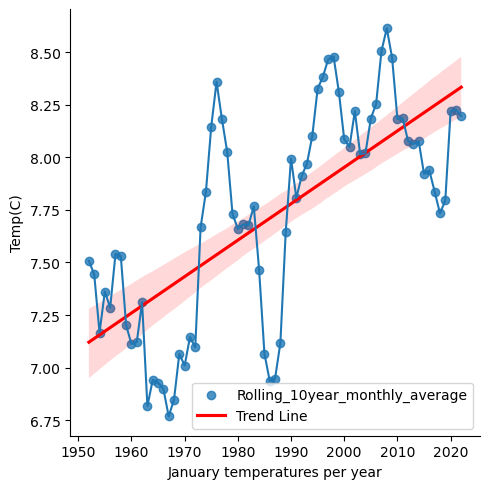

New York February temperatures from 1943 to 2022


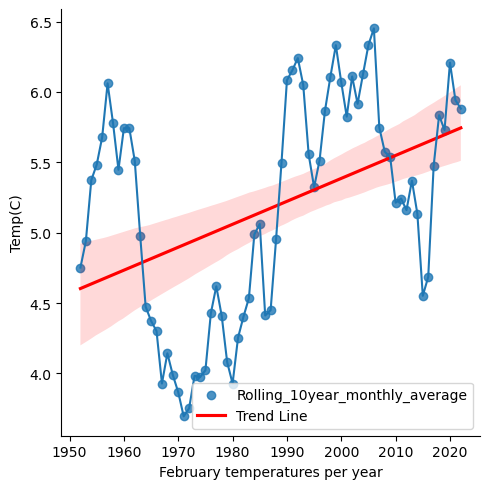

Dublin February temperatures from 1943 to 2022


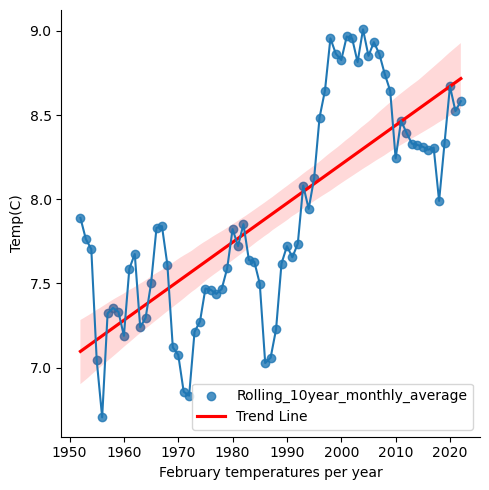

New York March temperatures from 1943 to 2022


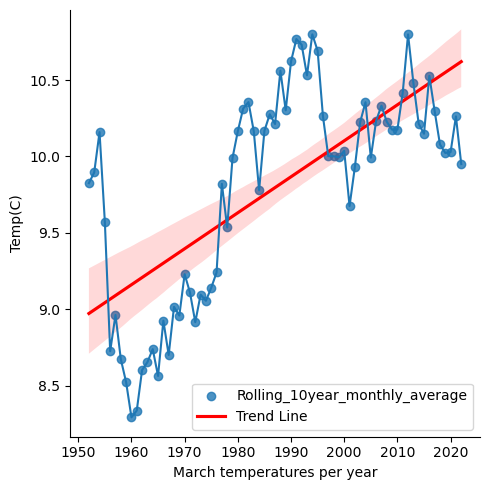

Dublin March temperatures from 1943 to 2022


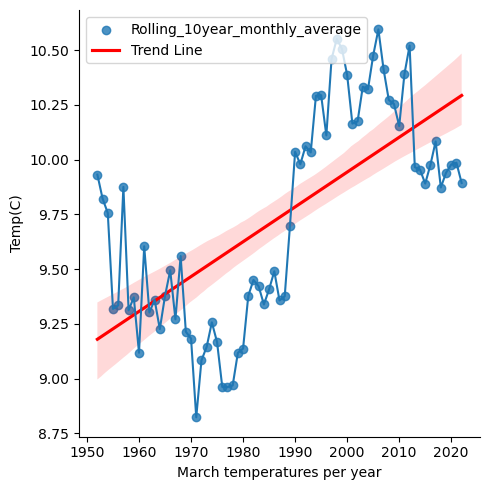

New York April temperatures from 1943 to 2022


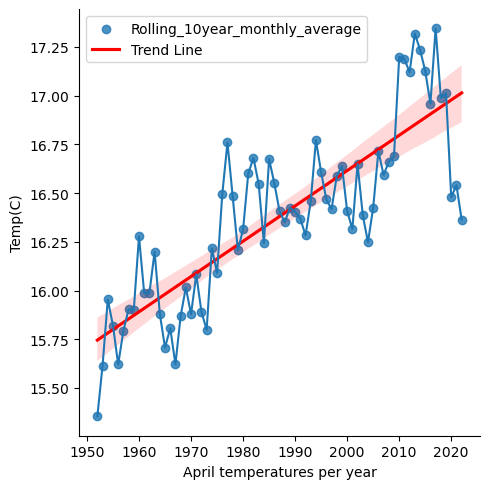

Dublin April temperatures from 1943 to 2022


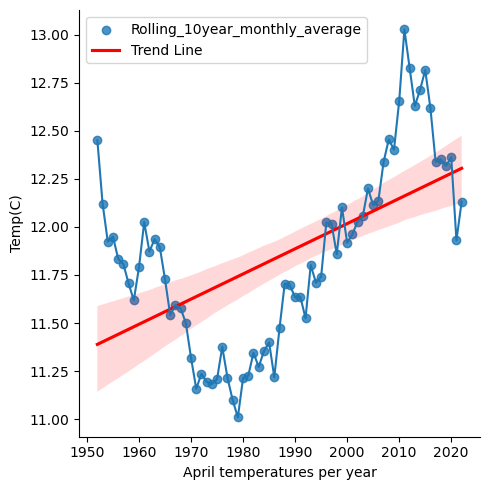

New York May temperatures from 1943 to 2022


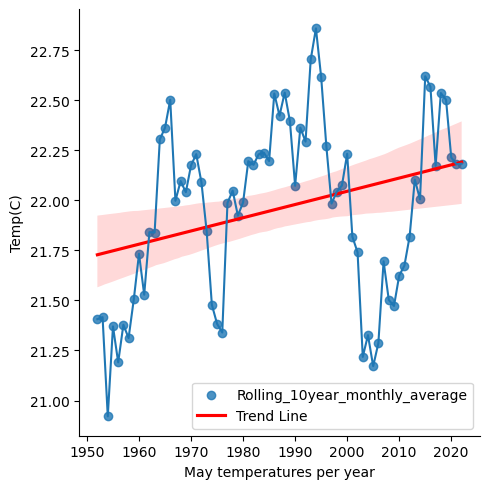

Dublin May temperatures from 1943 to 2022


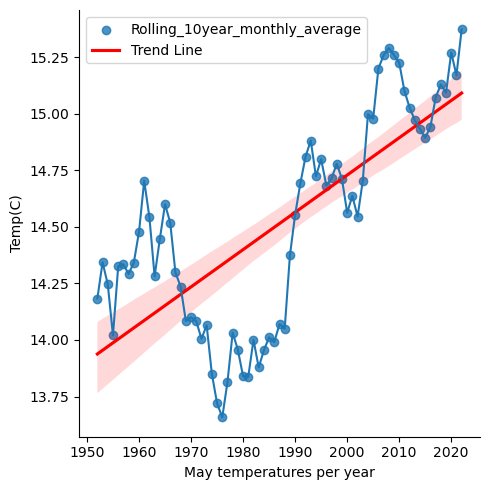

New York June temperatures from 1943 to 2022


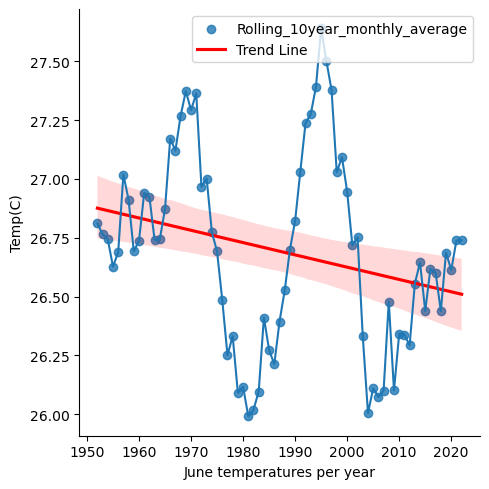

Dublin June temperatures from 1943 to 2022


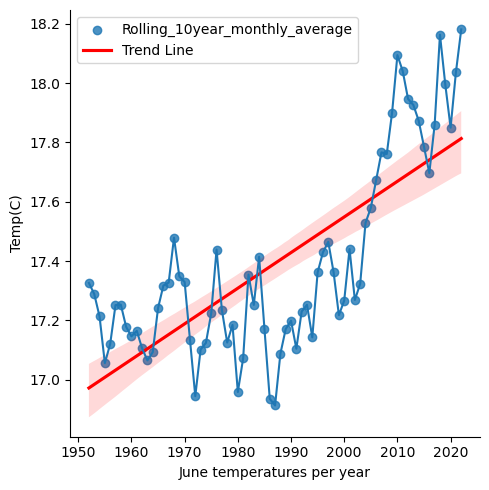

New York July temperatures from 1943 to 2022


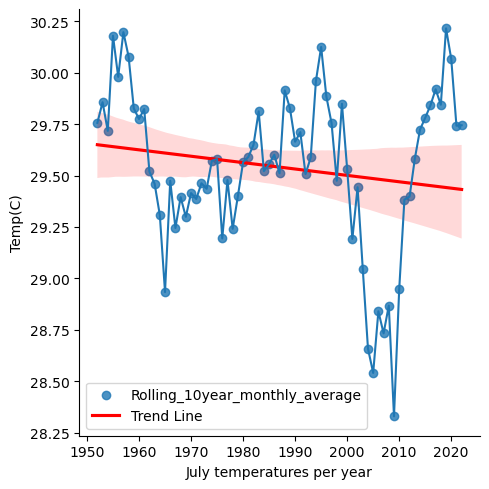

Dublin July temperatures from 1943 to 2022


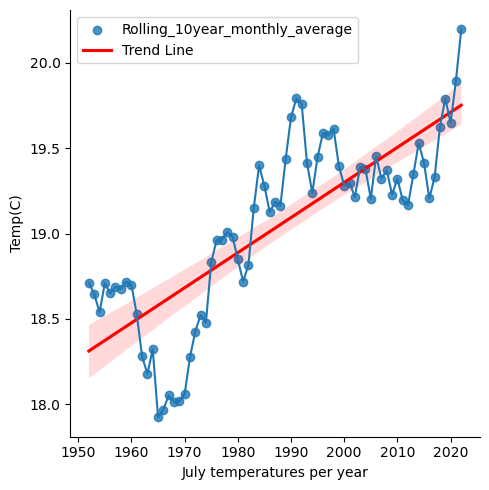

New York August temperatures from 1943 to 2022


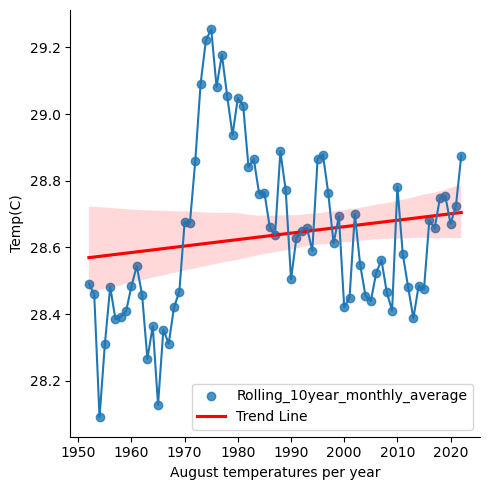

Dublin August temperatures from 1943 to 2022


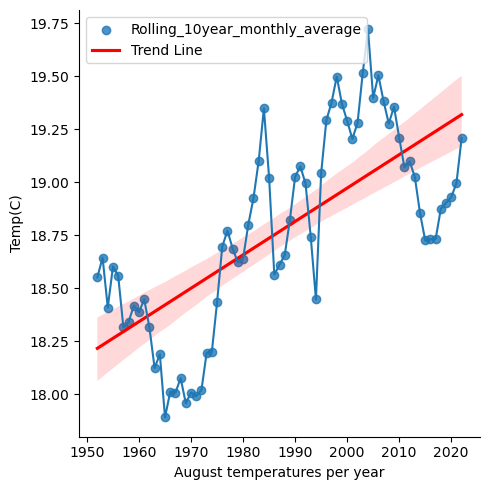

New York September temperatures from 1943 to 2022


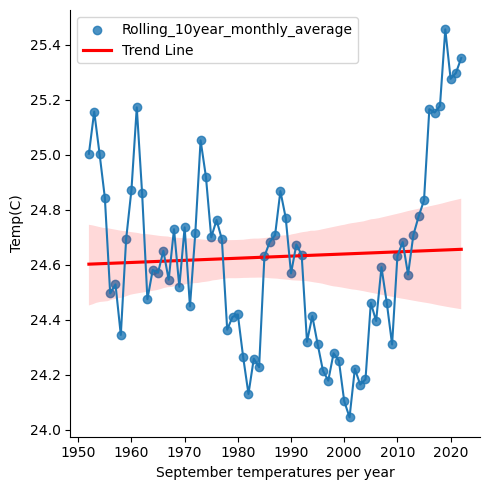

Dublin September temperatures from 1943 to 2022


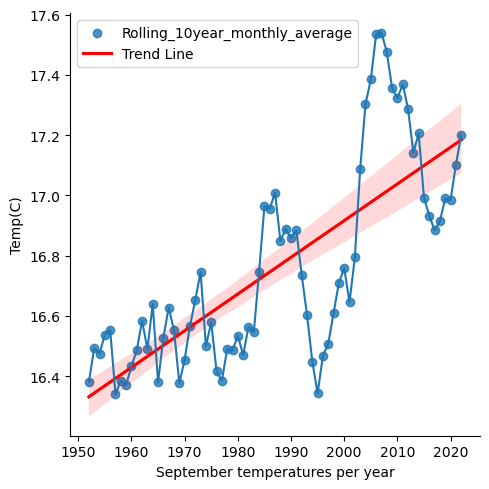

New York October temperatures from 1943 to 2022


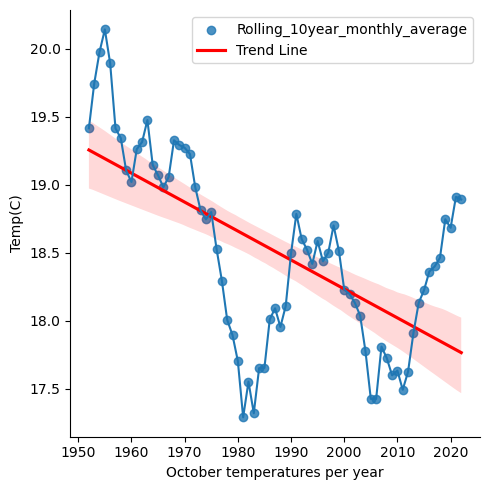

Dublin October temperatures from 1943 to 2022


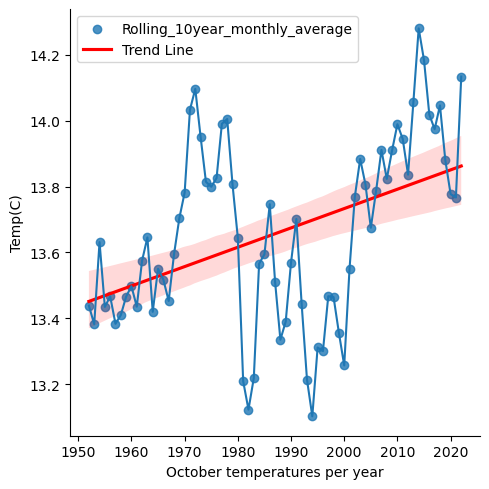

New York November temperatures from 1943 to 2022


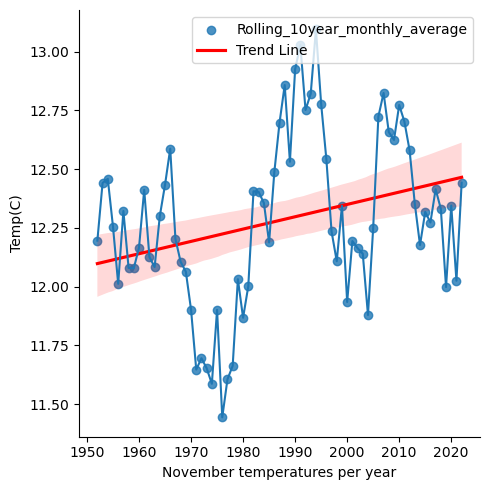

Dublin November temperatures from 1943 to 2022


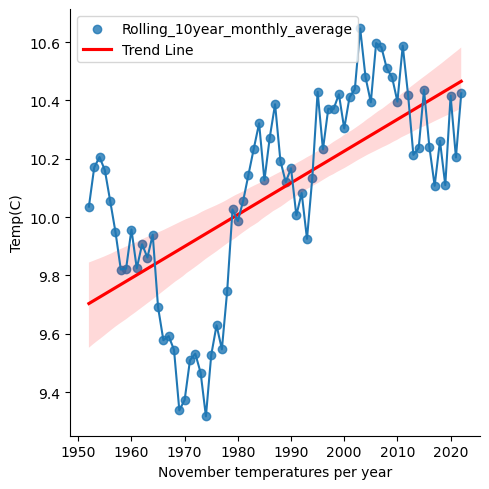

New York December temperatures from 1943 to 2022


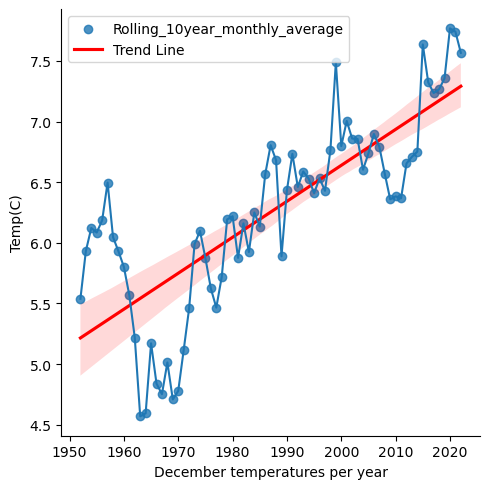

Dublin December temperatures from 1943 to 2022


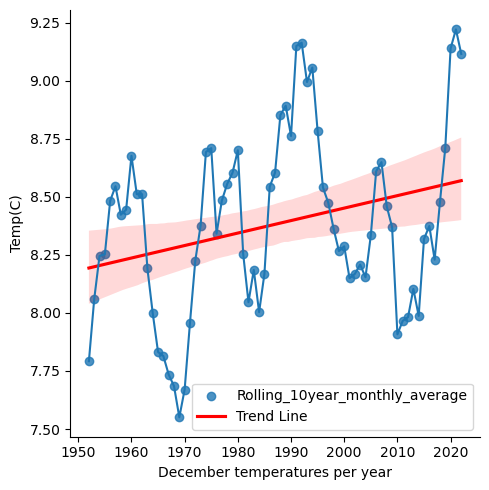

In [252]:
# Month specific trends, January vs January etc , for each month for New York and Dublin
for month in monthly_dict:
    plot_month_specific_temperature_trend (newyork_weather, month, 'New York')
    plot_month_specific_temperature_trend (dublin_weather, month, 'Dublin')

